In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
df=pd.read_csv('LDA.csv')
df

,file name,direction,verb,cause,effect,sent
0,A_10_2010_12_20.txt,forward,result in,market share,lost revenues,intellectual property rights and our ability t...
1,A_2_2018_12_20.txt,forward,result in,market share,lost revenues,intellectual property rights and our ability t...
2,A_3_2017_12_21.txt,forward,result in,market share,lost revenues,intellectual property rights and our ability t...
3,A_4_2016_12_20.txt,forward,result in,market share,lost revenues,intellectual property rights and our ability t...
4,A_5_2015_12_21.txt,forward,result in,market share,lost revenues,intellectual property rights and our ability t...
...,...,...,...,...,...,...
6043,ZTS_6_2015_02_27.txt,reverse,caused by,such unauthorized use,legal remedies,"despite these efforts and precautions, we may ..."
6044,ZTS_7_2014_03_26.txt,forward,result in,flock sizes,reduced spending,higher corn prices may contribute to reduction...
6045,ZTS_7_2014_03_26.txt,reverse,caused by,such unauthorized use,legal remedies,"despite these efforts and precautions, we may ..."
6046,ZTS_8_2013_03_28.txt,forward,result in,flock size,reduced spending,higher corn prices may contribute to reduction...


In [3]:
from __future__ import division
import pandas as pd
import os, re, string, math, codecs, csv

# NLTK
import nltk
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Keras via Tensorflow backend (Can also run via Theano backend).
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer     
from keras.preprocessing import sequence

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Phrases, phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec as wv
from gensim import models, similarities

In [4]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [5]:
os.getcwd()

'/Users/hilal.pataci/Desktop/sec_cleaning'

In [6]:
import nltk
#nltk.download()
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(len(stop_words))

179


In [8]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    #cleaned_text = [t for t in tokenized_text if t not in f_lmcd]
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    #cleaned_text = ' '.join(stemmer.stem(t) for t in cleaned_text)
    return cleaned_text

In [9]:
# tokenize, create seqs, pad
tok = Tokenizer(num_words=5000, lower=True, split=" ")
tok.fit_on_texts(df['sent'])
df_auto = tok.texts_to_sequences(df['sent'])

sent_lst = []

In [10]:
for doc in df['sent']:
    sentences = nltk.tokenize.sent_tokenize(doc)
    for sent in sentences:
        
        word_lst = [w for w in nltk.tokenize.word_tokenize(sent) if w.isalnum()]
        sent_lst.append(word_lst)

In [11]:
# Convert to list
data_list = df["sent"].values.tolist()
# print(data_list)

In [14]:
# remove punctuations, and remove any words with <=3 letters
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data_list))
# print(data_words)
# print(data_words[:1])

data_only_words = []
for item in data_words:
    joined = ' '.join(item)
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    joined = shortword.sub('', joined)
    
    string_mill = re.search(r'\bmillion\b',joined)
    if string_mill:
        joined = re.sub(r"million", "", joined)
        
    string_sfas = re.search(r'\bsfas\b',joined)
    if string_sfas:
        joined = re.sub(r"sfas", "", joined)
    
    string_1 = re.search(r'\bbusiness\b',joined)
    if string_1:
        joined = re.sub(r"business", "", joined)
        
    string_1a = re.search(r'\brisk factors\b',joined)
    if string_1a:
        joined = re.sub(r"risk factors", "", joined)
        
    string_7 = re.search(r'\bmanagement discussion analysis financial condition results operations\b',joined)
    if string_7:
        joined = re.sub(r"management discussion analysis financial condition results operations", "", joined)
        
    string_7a = re.search(r'\bquantitative qualitative disclosures about market risk\b',joined)
    if string_7a:
        joined = re.sub(r"quantitative qualitative disclosures about market risk", "", joined)
        
    patterns_0 = ["table", "contents", "font", "size", "face", "times", "roman", "style", "font", "size", "font", 
                "weight", "sfas", "fasb", "january", "february", "march", "april", "may", "june", "july", "august", "september",
                 "october", "november", "december"]
    #patterns = patterns_0 + f_lmcd
    for pattern in patterns_0:
        if re.search(pattern, joined):
            joined = re.sub(pattern, "", joined)
            
    #for word in f_lmcd:
        #if re.search(word, joined):
            #joined = re.sub(word, "", joined)
    
    data_only_words.append(joined)

# number of words in each list    
for item in data_only_words:
    print(len(item))

168
168
168
168
168
168
168
168
168
78
72
48
148
114
83
72
48
148
114
107
142
107
61
67
72
121
108
64
63
67
72
48
176
108
206
238
128
189
217
199
189
217
199
189
217
199
189
217
199
198
238
199
198
238
114
198
238
187
187
312
187
312
187
203
204
129
56
77
86
56
56
86
56
86
56
86
56
77
86
30
30
30
30
30
104
100
250
100
213
213
100
89
89
47
156
146
222
120
156
146
156
146
156
146
156
146
156
146
156
146
222
156
146
222
156
146
222
60
60
60
60
60
60
104
60
60
207
169
207
104
304
141
169
104
293
169
104
206
169
357
104
103
169
235
169
207
169
139
206
122
206
122
122
241
122
122
139
139
139
74
238
140
38
109
106
85
104
100
86
85
86
90
95
90
95
90
95
90
95
90
95
86
271
144
86
219
266
147
76
132
147
124
143
38
66
184
215
88
143
38
66
215
76
143
38
66
76
76
227
133
66
76
227
151
76
187
147
146
76
98
193
193
193
193
193
193
193
193
193
98
193
55
141
82
200
169
55
141
82
200
98
98
81
188
103
200
140
64
169
141
82
200
169
141
82
200
141
82
200
169
72
141
82
200
169
97
97
118
159
118
159
118
70
11

In [15]:
# remove stopwords, make bigrams and trigrams 
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Remove Stop Words
# remove_stopwords(data_only_words)
data_words_nostops = remove_stopwords(data_only_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [16]:
from nltk.stem.wordnet import WordNetLemmatizer
WNlemma = nltk.WordNetLemmatizer()

get_lemma = []
for words in data_words_bigrams:
    data_lemmatized = [WNlemma.lemmatize(t, pos='v') for t in words]
    get_lemma.append(data_lemmatized)
    
for item in get_lemma:
    #print(item)
    print(len(item))

count_word = {}
for item in get_lemma:
    for word in item:
        count = count_word.get(word,0)
        count_word[word] = count + 1
        
frequency_list = count_word.keys()

for words in frequency_list:
    if count_word[words] > 20:
        print(words, count_word[words])

18
18
18
18
18
18
18
18
18
9
6
5
15
13
9
6
5
15
13
13
17
13
8
8
6
14
12
8
7
8
6
5
17
12
22
21
14
19
19
22
19
19
22
19
19
22
19
19
22
20
21
22
20
21
14
20
21
15
15
37
15
37
15
24
18
11
6
8
7
6
6
7
6
7
6
7
6
8
7
4
4
4
4
4
11
11
27
11
24
24
11
9
9
5
13
14
21
12
13
14
13
14
13
14
13
14
13
14
13
14
21
13
14
21
13
14
21
8
8
8
8
8
8
11
8
8
23
19
23
11
31
14
19
11
30
19
11
21
19
39
11
11
19
26
19
23
19
13
20
11
20
11
11
28
11
11
13
13
13
8
27
17
4
11
11
10
12
10
7
10
7
10
8
10
8
10
8
10
8
10
8
7
29
14
7
20
28
14
8
14
14
13
14
4
7
20
21
10
14
4
7
21
8
14
4
7
8
8
24
16
7
8
24
17
8
20
14
16
8
11
20
20
20
20
20
20
20
20
20
11
20
6
16
9
18
17
6
16
9
18
10
12
9
18
12
18
16
7
17
16
9
18
17
16
9
18
16
9
18
17
9
16
9
18
17
11
11
14
16
14
16
14
7
14
14
19
13
20
7
19
13
30
7
7
20
16
20
7
8
13
20
11
8
13
20
7
19
13
20
7
19
13
20
7
19
13
20
7
19
13
20
7
19
13
20
7
19
8
15
10
10
19
8
15
10
10
18
29
10
18
29
10
18
29
10
18
8
29
10
18
8
31
10
18
8
8
10
19
8
8
10
19
8
15
10
10
59
9
17
10
17
17
17
18
18
20
8
22

In [17]:
# Create Dictionary
id2word = corpora.Dictionary(get_lemma)

# Create Corpus
texts = get_lemma

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1])

In [18]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ability', 1),
  ('capture', 1),
  ('competitors', 1),
  ('could', 2),
  ('countries', 1),
  ('easier', 1),
  ('enforce', 1),
  ('intellectual_property', 1),
  ('limit', 1),
  ('lose', 1),
  ('make', 1),
  ('market', 1),
  ('result', 1),
  ('revenues', 1),
  ('right', 1),
  ('share', 1),
  ('unavailable', 1)]]

In [20]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [21]:
# View the topics in LDA model

# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.042*"future" + 0.040*"increase" + 0.039*"credit" + 0.037*"substantial" + 0.034*"result" + 0.031*"also" + 0.030*"could" + 0.027*"default" + 0.026*"action" + 0.025*"covenant"'), (1, '0.083*"reduce" + 0.072*"fluctuations" + 0.064*"foreign" + 0.051*"exchange" + 0.044*"currency" + 0.033*"rate" + 0.032*"rat" + 0.031*"es" + 0.023*"although" + 0.021*"exist"'), (2, '0.054*"failure" + 0.041*"comply" + 0.039*"additional" + 0.036*"cause" + 0.035*"relate" + 0.032*"adverse" + 0.029*"loss" + 0.028*"could" + 0.027*"laws" + 0.022*"time"'), (3, '0.173*"affect" + 0.072*"condition" + 0.067*"adversely" + 0.064*"financial" + 0.058*"operations" + 0.057*"risk" + 0.050*"market" + 0.022*"manage" + 0.022*"materially" + 0.022*"sales"'), (4, '0.074*"company" + 0.061*"products" + 0.054*"ability" + 0.050*"include" + 0.043*"operate" + 0.042*"addition" + 0.038*"systems" + 0.029*"certain" + 0.022*"subject" + 0.018*"third_party"'), (5, '0.156*"regulations" + 0.052*"use" + 0.041*"unfavorable" + 0.039*"particular"

In [22]:
# Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=get_lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.257014814692651

Coherence Score:  0.361767629715156


In [25]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 934 kB/s eta 0:00:01


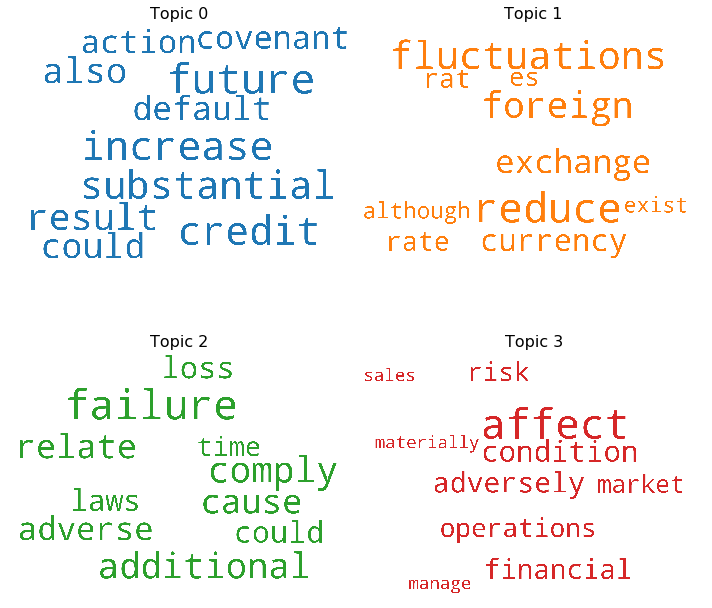

In [26]:
# Word Clouds of Top N Keywords in Each Topic
# Though you’ve already seen what are the topic keywords in each topic, 
# a word cloud with the size of the words proportional to the weight is a pleasant sight.

# Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [29]:
# Visualize the topics-keywords

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.316734  0.045331       1        1  23.703075
0      0.242505  0.047917       2        1  13.757253
3     -0.010242 -0.382928       3        1  13.599359
2      0.156450  0.006253       4        1  13.425048
4     -0.160315  0.175954       5        1  10.271912
9     -0.065725  0.141090       6        1   7.014660
6     -0.129937 -0.136846       7        1   6.790506
1     -0.104057  0.079362       8        1   5.245047
8     -0.124527  0.009711       9        1   3.853841
5     -0.120886  0.014155      10        1   2.339301, topic_info=                 Term         Freq        Total Category  logprob  loglift
12             result  5454.000000  5454.000000  Default  30.0000  30.0000
25             affect  2241.000000  2241.000000  Default  29.0000  29.0000
3               could  3484.000000  3484.000000  Default  28.0000  28.0000
205         condition   934.000000   934.000000  Default  27.0000  27.0000
138         adversely   872.000000   872.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
233   interpretations    13.657986    14.544632  Topic10  -5.0952   3.6924
1701       regulators    12.332750    13.219189  Topic10  -5.1972   3.6859
589       enforcement    12.306642    13.193398  Topic10  -5.1994   3.6857
2392     increasingly    12.101902    12.989086  Topic10  -5.2161   3.6846
2964          venture    12.746866    13.704994  Topic10  -5.1642   3.6828

[350 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
0         5  0.998513                ability
943       6  0.983656                 access
232      10  0.984161                account
871       6  0.996767                acquire
671       9  0.997269           acquisitions
...     ...       ...                    ...
1104      1  0.995103                weather
314       3  0.993763                   well
2826     10  0.994636  without_authorization
2298      6  0.981966     without_limitation
204       7  0.997388                  would

[326 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 4, 3, 5, 10, 7, 2, 9, 6])